<a href="https://colab.research.google.com/github/altayavci/time-series/blob/dev/stockpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [115]:
start_date="2002-04-29"
end_date="2022-04-29"

In [116]:
df = pdr.get_data_yahoo("AAPL",start_date,end_date)
#data_reader  yfinance api'sini kullanıyor arkada

[*********************100%***********************]  1 of 1 completed


In [117]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-04-29,0.413571,0.429643,0.412321,0.427857,0.365318,272288800
2002-04-30,0.426607,0.435357,0.424107,0.433393,0.370045,280963200
2002-05-01,0.433750,0.433750,0.417143,0.428214,0.365623,214704000
2002-05-02,0.425179,0.434643,0.421429,0.423036,0.361202,239344000
2002-05-03,0.420893,0.428929,0.418393,0.419821,0.358457,230781600


In [118]:
df.reset_index(inplace=True)

df=df.drop(["Adj Close"],axis=1)

df.Date=pd.to_datetime(df.Date)


In [119]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [120]:
df.head()


,Date,Open,High,Low,Close,Volume
0,2002-04-29,0.413571,0.429643,0.412321,0.427857,272288800
1,2002-04-30,0.426607,0.435357,0.424107,0.433393,280963200
2,2002-05-01,0.433750,0.433750,0.417143,0.428214,214704000
3,2002-05-02,0.425179,0.434643,0.421429,0.423036,239344000
4,2002-05-03,0.420893,0.428929,0.418393,0.419821,230781600


In [139]:
df.shape

(5037, 6)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5037 entries, 0 to 5036
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5037 non-null   datetime64[ns]
 1   Open    5037 non-null   float64       
 2   High    5037 non-null   float64       
 3   Low     5037 non-null   float64       
 4   Close   5037 non-null   float64       
 5   Volume  5037 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 236.2 KB


In [141]:
ma_100days=df.Close.rolling(window=100).mean()
#ilk 100 terim na olcak cünkü : n=0,1,2,3.. için df.Close[n:n+100].mean() 
#yani 0. terimden 100. terime kadar olanların ortalamasını alıp 99. indekse yazdık
#bu şekilde [0:100].mean(),[1:101].mean() ... n=0,1,2,3 n[:n+100] => ma_ndays[n+99]
ma_200days=df.Close.rolling(window=200).mean()
#200 günlük hareketli ortalama (moving average)

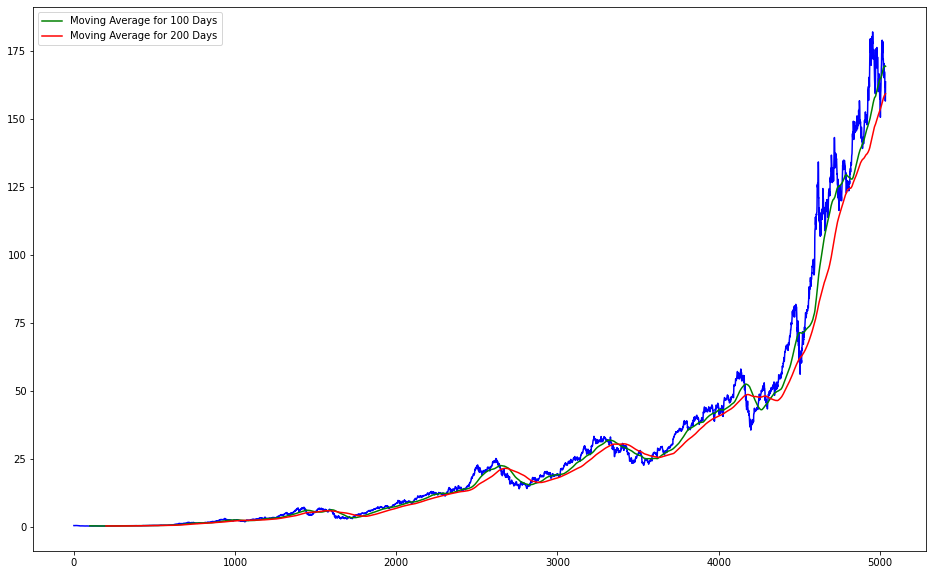

In [144]:
fig=plt.figure(figsize=(16,10))
plt.plot(df.Close,color="blue")
plt.plot(ma_100days,color="green",label='Moving Average for 100 Days')
plt.plot(ma_200days,color="red",label='Moving Average for 200 Days')
plt.legend()
plt.show()
#sonuca bakarsak göreceğiz ki ilk 0'dan 99. indekse kadar bir boşluk olcak, sonrasında grafikte ma yani (hareketli ortalama)'yı görebileceğiz
#bu da 100 günlük ve 200 günlük hareketli ortalama demektir 

In [145]:
data_training=pd.DataFrame(df.Close[0:int(df.shape[0]*0.7)])
data_testing=pd.DataFrame(df.Close[int(df.shape[0]*0.7):int(df.shape[0])])

#simdi de training ve testing icin datayı bölelim
#fakat bu zaman serisi analizi oldugundan train_test_split methodunu kullanmıcaz !!! 

In [146]:
from sklearn.preprocessing import MinMaxScaler

In [168]:
ct=MinMaxScaler(feature_range=(0,1))
data_training_scaled=ct.fit_transform(data_training)

#normalizasyon ve scaling icin minmaxscaler kullandık. sebebini tam bilmiyorum ama 0 ile 1 arasında scale ediyor
#standartscaler z^2 i kullanıyordu yani -3 ile 3 arası 

In [169]:
X_train,y_train=[],[]

for j in range(100,data_training_scaled.shape[0]):

    X_train.append(data_training_scaled[j-100:j])
    #0-100,1-101,2-102. +...n - n+100. indeksli değerler totalde data_training.shape[0] kadar satıra kaydediliyor
    y_train.append(data_training_scaled[j,0])
    #j,0 denmesnin sebebi her satırda k'dan k+100 indeksli close değeri oldugundan her satırdaki sadece k. indeksli elemanı alma
X_train,y_train=np.array(X_train),np.array(y_train)

In [170]:
past_100days=data_training.tail(100)

df_last=past_100days.append(data_testing,ignore_index=True)
#bunları yapmamızın sebebi, prediction icin. data_testing'in ilk indexi k olsun, data_training.tail() dediğimizde en başta belirlen(length-5. index)indeks de k-100. indekstir. 
#rolling ile ilk 100 değeri atladğımız icin past_100days'i de test datasetimize ekliyoruz .

In [171]:
input_data=ct.fit_transform(df_last)

X_test,y_test=[],[]

for k in range(100,input_data.shape[0]):

    X_test.append(input_data[k-100:k])
    y_test.append(input_data[k,0])

X_test,y_test=np.array(X_test),np.array(y_test)

In [62]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
#Model kısmına geciyoz (ml model)

In [ ]:
model=Sequential()

model.add(LSTM(units=50,activation="tanh",return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
#bura shape'te 1 dememizin sebebi range'i yüzden baslatınca her satırda aslında 0-100,100-200. elemanlar allocate edildi bu sebeple input_shape 100 olmalıydı
model.add(LSTM(units=60,activation="tanh",return_sequences=True))
model.add(Dropout(0.3))
#The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

model.add(LSTM(units=80,activation="tanh",return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation="tanh"))
model.add(Dropout(0.5))

model.add(Dense(units=1)) 
#1 parametre tahmini yapmak istediğimiz icin 1 dedik (closing price o parametre ), bütün layerları bir araya getiriyor (4)


#https://www.koreascience.or.kr/article/JAKO202025356104177.pdf

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_16 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_17 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_17 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_18 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_18 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_19 (LSTM)              (None, 120)              

In [63]:
X_train.shape

(3425, 100, 1)

In [64]:
X_train.shape

(3425, 100, 1)

In [ ]:
model.compile(optimizer="adam",loss="mean_squared_error",metrics=['mean_absolute_error','accuracy'])

history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

model.save("keras_model.h5")

#drive'da yeni save edileni yüklemeyi unutma 
#tekrar calıstır knk 

Epoch 1/10
108/108 [==============================] - 60s 365ms/step - loss: 0.0094 - mean_absolute_error: 0.0556 - val_loss: 0.0010 - val_mean_absolute_error: 0.0212
Epoch 2/10
108/108 [==============================] - 38s 348ms/step - loss: 0.0036 - mean_absolute_error: 0.0369 - val_loss: 0.0132 - val_mean_absolute_error: 0.0878
Epoch 3/10
108/108 [==============================] - 38s 351ms/step - loss: 0.0035 - mean_absolute_error: 0.0372 - val_loss: 0.0013 - val_mean_absolute_error: 0.0230
Epoch 4/10
108/108 [==============================] - 39s 357ms/step - loss: 0.0030 - mean_absolute_error: 0.0343 - val_loss: 0.0013 - val_mean_absolute_error: 0.0245
Epoch 5/10
108/108 [==============================] - 38s 348ms/step - loss: 0.0027 - mean_absolute_error: 0.0338 - val_loss: 0.0034 - val_mean_absolute_error: 0.0415
Epoch 6/10
108/108 [==============================] - 37s 344ms/step - loss: 0.0026 - mean_absolute_error: 0.0328 - val_loss: 0.0081 - val_mean_absolute_error: 0.061

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [151]:
from keras.models import load_model

model=load_model("keras_model.h5")

In [173]:
y_test=ct.inverse_transform(y_test.reshape(-1,1))

In [172]:
yhat=model.predict(X_test)

48/48 [==============================] - 5s 79ms/step


In [174]:
yhat=ct.inverse_transform(yhat.reshape(-1,1))

In [179]:
y_test

array([[ 23.70750046],
       [ 23.43499947],
       [ 23.40999985],
       ...,
       [156.80000305],
       [156.57000732],
       [163.63999939]])

In [224]:
yhat

array([[ 28.992966],
       [ 28.51656 ],
       [ 27.95884 ],
       ...,
       [157.3139  ],
       [156.0268  ],
       [154.4556  ]], dtype=float32)

In [223]:
df.query('Close<23.71 & Close>23.70')
#Date i nerden nereye almış onu öğrenmek için 

,Date,Open,High,Low,Close,Volume
2606,2012-08-30,23.951429,23.983929,23.673214,23.709642,302699600
3525,2016-04-28,24.402500,24.469999,23.562500,23.707500,328970800


In [299]:
dates=df.iloc[3525:df.shape[0]].Date.apply(lambda x : str(x).replace('-','/')[:11]).to_numpy()

In [300]:
dates[:5],dates[len(dates)-5:len(dates)]

(array(['2016/04/28 ', '2016/04/29 ', '2016/05/02 ', '2016/05/03 ',
        '2016/05/04 '], dtype=object),
 array(['2022/04/22 ', '2022/04/25 ', '2022/04/26 ', '2022/04/27 ',
        '2022/04/28 '], dtype=object))

In [308]:
y_test.shape,dates.shape

((1512, 1), (1512,))

In [225]:
ma_100days=pd.DataFrame(y_test).rolling(window=100).mean()
ma_200days=pd.DataFrame(y_test).rolling(window=200).mean()

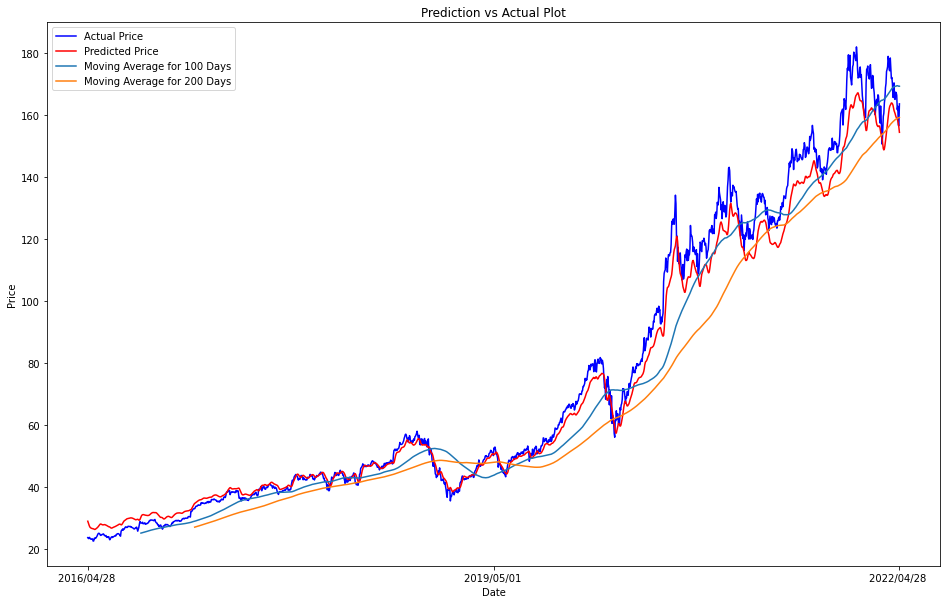

In [319]:
fig=plt.figure(figsize=(16,10))
plt.plot(y_test,color="blue",label="Actual Price")
plt.plot(yhat,color="red",label="Predicted Price")
plt.plot(ma_100days,label='Moving Average for 100 Days')
plt.plot(ma_200days,label='Moving Average for 200 Days')
plt.xlabel("Date")
plt.xticks([0,756,1511],[dates[0],dates[756],dates[1511]])
plt.ylabel("Price")
plt.title('Prediction vs Actual Plot')
plt.legend()